In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from matplotlib import pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Part 1: Data Preprocessing

In [41]:
train = pd.read_csv(r"D:\3.6120 DATA SCIENCE II\train.csv",sep=";")
test = pd.read_csv(r"D:\3.6120 DATA SCIENCE II\test.csv",sep=";")

In [42]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [44]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\lifen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")  
5 - default: has credit in default? (binary: "yes","no")  
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")    
related with the last contact of the current campaign:  
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")  
10 - day: last contact day of the month (numeric)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")   
12 - duration: last contact duration, in seconds (numeric)   
other attributes:  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)   
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

Output variable (desired target):  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")  

Missing Attribute Values: None  

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


There is no missing values

In [47]:
# Checking missing values
print(train.isna().values.any())

print(test.isna().values.any())

False
False


There is no duplicated values.

In [48]:
#Checking duplicated values
print(train.duplicated().value_counts())

print(test.duplicated().value_counts())

False    45211
Name: count, dtype: int64
False    4521
Name: count, dtype: int64


Data visualzation.  
There is noticeable difference between y and job/marital/education/default/housing/loan/contact.  
So drop columns with less difference with y:month, day and poutcome.  

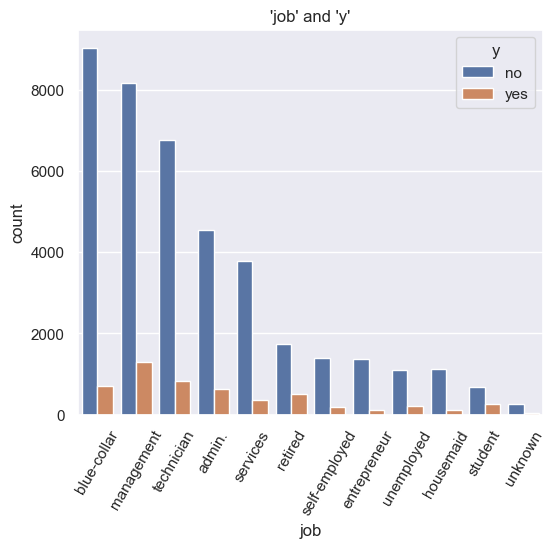

In [49]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "y", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("'job' and 'y'")
plt.show()

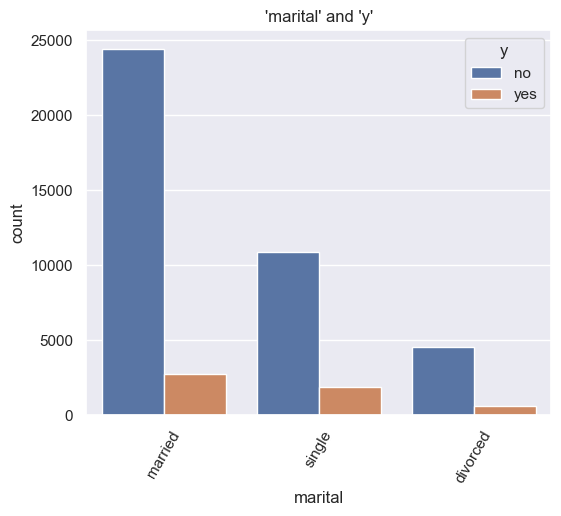

In [50]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "y", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("'marital' and 'y'")
plt.show()

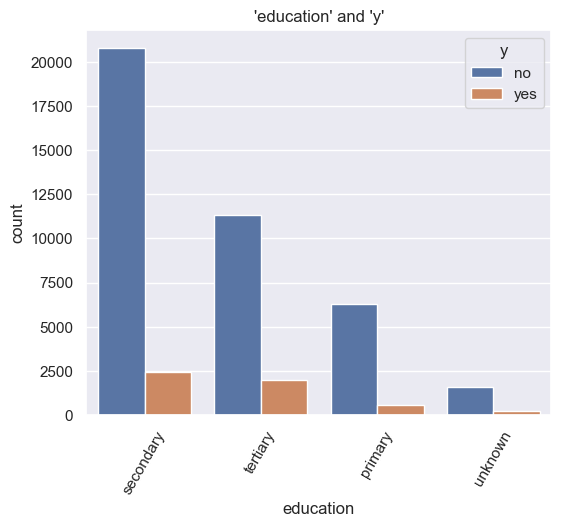

In [51]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "y", order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("'education' and 'y'")
plt.show()

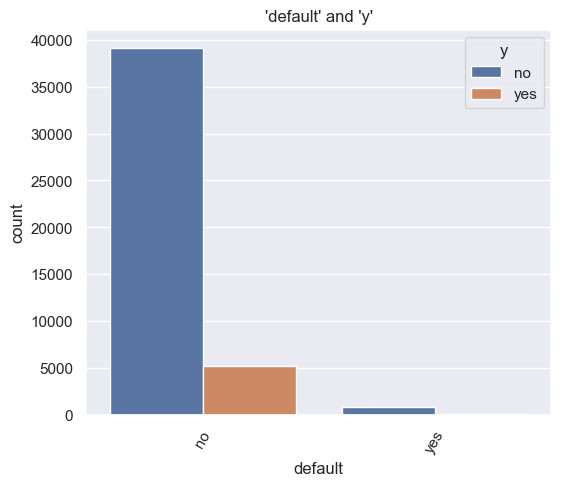

In [52]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "y", order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=60)
plt.title("'default' and 'y'")
plt.show()

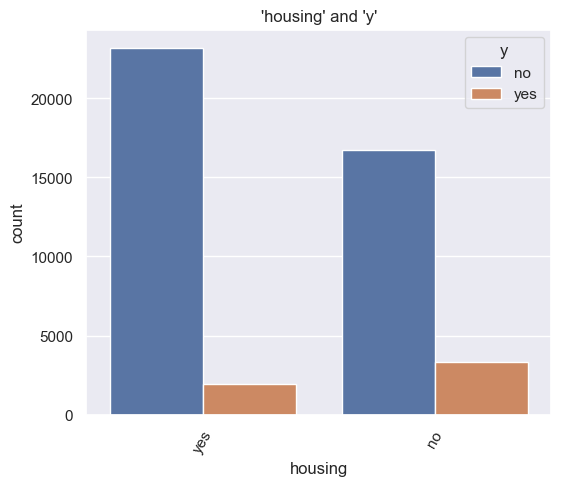

In [53]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "y", order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
plt.title("'housing' and 'y'")
plt.show()

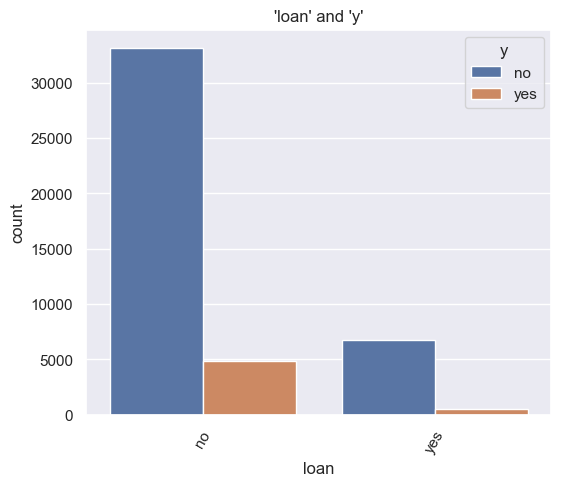

In [54]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "y", order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
plt.title("'loan' and 'y'")
plt.show()

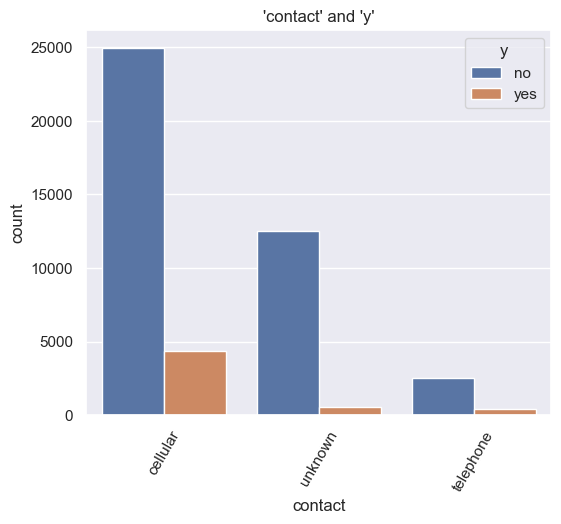

In [55]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "y", order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("'contact' and 'y'")
plt.show()

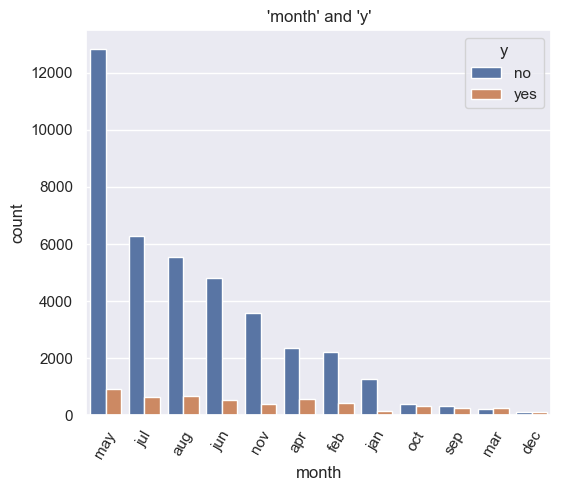

In [56]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "y", order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("'month' and 'y'")
plt.show()

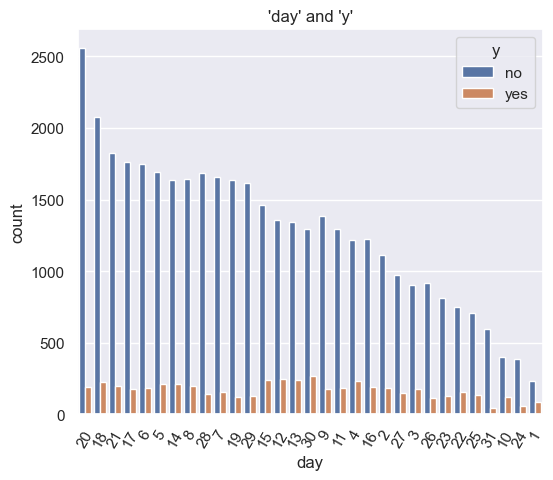

In [57]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="day", data = train, hue = "y", order = train["day"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("'day' and 'y'")
plt.show()

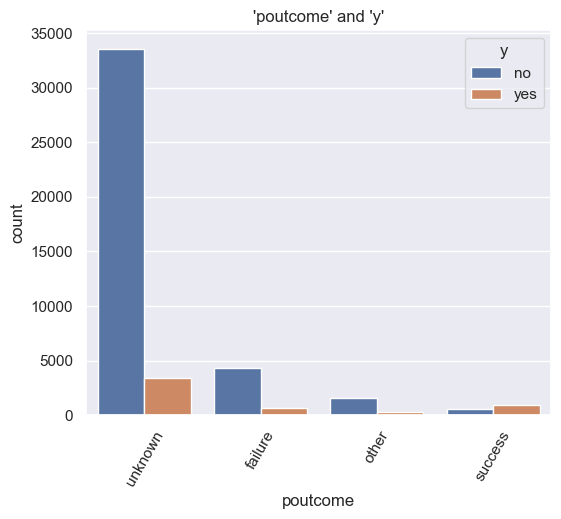

In [58]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="poutcome", data = train, hue = "y", order = train["poutcome"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("'poutcome' and 'y'")
plt.show()

In [59]:
df_train = train.drop(['day','month','poutcome'], axis=1)
df_test = test.drop(['day', 'month','poutcome'], axis=1)

In [60]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,no


Transfer 'yes or no' columns into 1 and 0.

In [61]:
df_train['housing'] = df_train['housing'].replace({'yes': 1, 'no': 0})
df_test['housing'] = df_test['housing'].replace({'yes': 1, 'no': 0})
df_train['loan'] = df_train['loan'].replace({'yes': 1, 'no': 0})
df_test['loan'] = df_test['loan'].replace({'yes': 1, 'no': 0})
df_train['default'] = df_train['default'].replace({'yes': 1, 'no': 0})
df_test['default'] = df_test['default'].replace({'yes': 1, 'no': 0})
df_train['y'] = df_train['y'].replace({'yes': 1, 'no': 0})
df_test['y'] = df_test['y'].replace({'yes': 1, 'no': 0})

In [63]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,0


Prepare for One Hot Encoding and Scaling

In [64]:
y_train = df_train["y"]
X_train = df_train.drop("y", axis=1)
y_test = df_test["y"]
X_test = df_test.drop("y", axis=1)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 4.5+ MB


In [65]:
num_cols = X_train.select_dtypes(include=['int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [66]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

# Part 2: Build logistic regression and KNN models

In [67]:
# Set up models to compare - adding initial parameters

knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])


In [68]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [69]:
# Create dictionary to store the results of each model
results = {}

The Random Forest model appears to have the highest performance across all metrics, with perfect precision and very high recall, F1-Score, and accuracy. However, it also takes significantly more time to train compared to other models.  

Decision Tree also performs exceptionally well and is very fast to train.  

Logistic Regression and AdaBoost have relatively lower performance, especially in terms of precision and recall.  

K-Nearest Neighbors and Voting have intermediate performance.  

Random Forest and Decision Tree seem to be strong candidates if high accuracy is a priority, while Logistic Regression and AdaBoost may be more computationally efficient but with slightly lower performance.  








In [70]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.705882  0.299424  0.420485  0.904888  0.626468
Logistic Regression   0.562162  0.199616  0.294618  0.889847  0.385964
Decision Tree         0.955193  0.900192  0.926877  0.983632  0.387191
Random Forest         1.000000  0.998081  0.999039  0.999779  5.757070
AdaBoost              0.528169  0.287908  0.372671  0.888299  2.113609
Bagging               0.991736  0.921305  0.955224  0.990046  2.287742
Voting                0.867647  0.339731  0.488276  0.917939  1.274431


# Part 3 Ensemble Modelling

In [71]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [76]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [5, 10, 20, 30, 50]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [100, 200, 300, 400], 'classifier__max_depth': [10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20, 25]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
# Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
# Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
# Fit the model
    grid.fit(X_train, y_train)
    
# Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
# Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
# Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                                           Best Params  \
K-Nearest Neighbors                    {'classifier__n_neighbors': 50}   
Logistic Regression                             {'classifier__C': 0.1}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 10, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 25}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision    Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.598901  0.209213    0.3101  0.892723   24.989778  
Logistic Regression  0.557377  0.195777  0.289773  0.889405    4.537466  
Decision Tree        0.736544   0.49904  0.594966  0.921699    6.983581  
Random Forest        0.893333  0.257198  0.399404   0.91086  841.140428  
AdaBoost             0.498099   0.251

# Part 4 Performance Comparison

Among the ensemble models, the **Bagging Classifier** has the highest precision, recall, F1-Score, and accuracy, making it the best-performing model on this dataset. It achieves near-perfect precision and recall.  

Random Forest also performs well, with high precision and accuracy, although its recall is relatively lower.  

AdaBoost has the lowest performance among the ensemble models in terms of precision, recall, and accuracy.  

The Voting Classifier is interesting because it combines multiple models. The 'hard' voting shows better performance. So 'soft' is hided by default.   The 'hard' voting strategy provides good precision, recall, F1-Score, and accuracy, but it's not as strong as Bagging. Unfortunately, the 'soft' voting results are not provided in the output, so it's unclear how it performs in comparison.   

The training times for Random Forest and Bagging are considerably higher compared to the other models, especially when the number of estimators is increased.  

Overall, if I prioritize precision and recall, the Bagging Classifier appears to be the best choice.  

However, if the computational cost need to be considered, a faster model with good accuracy, Random Forest is a strong contender. The choice between 

# Part 5: Interpretation and Justification
The performance of ensemble models on a given dataset can be influenced by various factors, including the nature of the data, the characteristics of the models, and the choice of hyperparameters. 

### Why did the ensemble models perform the way they did?
1. *Bagging Classifier:*
   - *Performance:* The Bagging Classifier tends to perform well on a variety of datasets because it reduces variance and overfitting by averaging the predictions of multiple base models. It achieves near-perfect precision and recall, indicating that it is able to capture both positive and negative instances effectively.
   - *Expectation:* It was expected to perform well due to its ability to reduce overfitting and improve the stability of predictions.

2. *Random Forest:*
   - *Performance:* Random Forest builds on the idea of bagging but adds an extra layer of randomness by selecting a random subset of features at each split. While it generally performs well, it might have a slightly lower recall due to this randomness, as some important features may not be selected in certain trees.
   - *Expectation:* The high precision and accuracy were expected, but the lower recall is consistent with the added randomness.

3. *AdaBoost:*
   - *Performance:* AdaBoost focuses on misclassified samples, which can be sensitive to noisy data. If the dataset has noisy or irrelevant features, it can negatively impact performance. AdaBoost appears to have lower precision, recall, and accuracy, possibly due to the dataset's characteristics.
   - *Expectation:* Lower performance might have been expected if the dataset had noisy features or if the boosting process overemphasized difficult-to-classify instances.

4. *Voting Classifier (Hard Voting):*
   - *Performance:* The 'hard' voting strategy combines predictions by majority vote, which can be effective if the individual models have different strengths. In this case, it shows good precision, recall, and accuracy, although it's not as strong as Bagging.
   - *Expectation:* 'Hard' voting was expected to perform reasonably well, as it combines diverse models. The absence of 'soft' voting results makes it difficult to make a direct comparison.

### If you had to pick one model to implement in business process, which would it be and why?
### What decision criteria did you use to arrive at this conclusion?
When selecting a model for business process implementation, it's essential to consider not only performance metrics but also computational cost and interpretability.

- *Decision Criteria:*
  - *Precision-Recall Trade-off:* If the business process has a strict requirement for both high precision and high recall (e.g., in healthcare or finance), the Bagging Classifier, with its excellent precision and recall, may be the preferred choice.
  - *Computational Cost:* If computational cost is a concern, especially in real-time or large-scale applications, Random Forest might be a better option as it is faster to train than Bagging.
  - *Interpretability:* If interpretability is crucial for business stakeholders to understand the model's decisions, Decision Trees (as used in Bagging) are inherently more interpretable than Random Forest, which is an ensemble of trees.

Ultimately, the choice of the model should align with the specific business requirements and constraints. If there is a strict need for both precision and recall, the Bagging Classifier should be considered despite its longer training time. If computational efficiency is a priority, Random Forest provides a good balance between accuracy and speed. Additionally, Decision Trees can be useful when interpretability is a critical factor.

The decision criteria used to arrive at this conclusion involve a trade-off between precision and recall, computational cost, and interpretability, which are driven by the specific needs and constraints of the business process.